## Importing modules needed for functioning

In [2]:
import PIL
from PIL import Image

In [3]:
from matplotlib import pyplot as plt

In [4]:
import cv2

In [5]:
import difflib

In [6]:
import time

## Setting up plaintext file handle and key file handle

In [7]:
plaintext_file_handle = open('plaintext_file_l.txt', 'r')

In [8]:
key_file_handle = open('key_file.txt', 'r')

In [9]:
plaintext = plaintext_file_handle.read()
print(plaintext)

Hi, this is a 
temporary file used to implement 
the A-S algorithm. 
Let's see how it goes...

!@#$%^&*()<>:"{}[];',./|\1234567890_+-=~`"

But I must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and I will give you a complete account of the system, and expound the actual teachings of the great explorer of the truth, the master-builder of human happiness. No one rejects, dislikes, or avoids pleasure itself, because it is pleasure, but because those who do not know how to pursue pleasure rationally encounter consequences that are extremely painful.

Nor again is there anyone who loves or pursues or desires to obtain pain of itself, because it is pain, but because occasionally circumstances occur in which toil and pain can procure him some great pleasure. To take a trivial example, which of us ever undertakes laborious physical exercise, except to obtain some advantage from it?

But who has any right to find fault with a man who chooses to en

In [10]:
key = key_file_handle.read()
print(key)

M:~kZr$L0t+[}v#mpXaE+\kJYI-1br!ErgOu]{N_"3y?a9am?5rrN~UBd4_bdL%Qfp<VF9l8)rA}^m8bV7gF/W>(,<K0G2I-Z@&`sYb@llUzDAx!#TgP2gBP#><vxtmN% G*Qbb{v.h]0G}%?s/Ah_Zyxk3?:=yH!H"#8!L;~r}%au\m2_iPE<SeCsrMu9Mf2Dl\bJ,U!/6*ddq|*#9EKUF/h4')T\=$hrnuYbj/7O0|4qC!3f$bc.`y<&<|X]:5%n/0mqZ_t|@sVRc7?R&qLZMZaKx[[i'BD6T.ty^\XWF;cz#.3ers>h]\Dn?*"H#Rw|Pf EH.t_sTuz'u4-utt90^il%]&~<9|1A>kiF-A|9w'!4?G9[!wg;}*[h5").BUR\;}p4h-W9I`PZ417OMN?[/&IauBf)9ot Rj?s5F^~)oVBGtNO?,rVkV@)["i,ENg|SG2`lsq@G{Vv`~SlB^0$iqveFCl!N|k_fZ %FbAp2~mD2hFXIZGCn9i<5pq?C^0lM*}a+6s`QD%}>%lj1kT$v<uE*L~Sv#p}S)FD]Y>7ANXb|z|25qm5,aT<S{.r])&?e25:!q`y+\2\:DU DN*{6"y9;w~Ww?d"IE[@to=i#R3eexa';0?6#>Cm!HX$~4A?tVxhb%=s6GTdz~q{U3J9Aq^0.=i#U!-@n;M9Xyu+vj&-ahApK8D)#QgS'Js-[#wn@YuyY-D.=\`i,:Qhv+a$Y>(}a|M\Kk9INb7@$!;p?UZweq!D+\r@hi*vscy,%FM(kmxi"n{s`P9A"/e{^(6/D3kz5jTEX x&5_kO`CN}Hfue=J&@eN*fHiRoaiol[cbo\&o0l`|RZI"CwEX8vKi+"%T16%~v~ZQ;iX Z6By3LxI_sykmRo'~AD#zlKyo3.^So4ARBWlhz11"}+J3ywH^=:n9R?Jo,|1$HJhw,U*J7c0,gR0 &Sr:J2!7gOza_'<Va.%\`4Cwa[\bi3_rVK>=& u#J[PZuMkM(4X\q

In [11]:
def diffcheck(src_file, dest_file):
    original_lines = open(src_file).readlines()
    encrypted_lines = open(dest_file).readlines()

    delta = False
    for ori, enc in zip(original_lines, encrypted_lines):
        if ori != enc:
            print('Diff found: {} vs {}'.format(ori, enc))
            delta = True
            break
        else:
            len_diff = len(ori) - len(enc)
            if len_diff > 0:
                print('File length mismatch')
                delta = True
                break
            elif len_diff < 0:
                print('File length mismatch')
                delta = True
                break
    
    if not delta:
        print('No diff')
    else:
        print('Diff')

### Seeking file handlers to the start

In [12]:
plaintext_file_handle.seek(0, 0)
key_file_handle.seek(0, 0)

0

# Text encryption with text

In [13]:
def text_encode_decode(from_file_path, key_path, to_file_path):
    from_file_handle = open(from_file_path, 'r', encoding='utf8')
    key_file_handle = open(key_path, 'r', encoding='utf8')
    to_file_handle = open(to_file_path, 'w', encoding='utf8')
    
    from_file_handle.seek(0, 0)
    key_file_handle.seek(0, 0)
    
    i = 0
    t0 = time.perf_counter()
    while True:
        p_i = from_file_handle.read(1)
        if p_i == '':
            # end of en/deciphering process
            break
            
        k_i = key_file_handle.read(1)
        if k_i == '':
            # end of key, cycle back to beginning
            key_file_handle.seek(0, 0)
            k_i = key_file_handle.read(1)
        
        int_p_i = ord(p_i)
        int_k_i = ord(k_i)
        if int_p_i == 128:
            # for Windows file systems - handle ASCII 13 (\r)
            int_p_i = 13
        int_p_i_XOR_k_i = (int_k_i ^ int_p_i) % 128
        if int_p_i_XOR_k_i == 13:
            # handles ASCII 13 (\r)
            p_i_XOR_k_i = chr(128)
        else:
            p_i_XOR_k_i = chr(int_p_i_XOR_k_i)
        
        i += 1
        print('{}.\t{} ({})\t^\t{} ({})\t->\t{} ({})'.format(i, p_i, int_p_i, k_i, int_k_i, p_i_XOR_k_i, int_p_i_XOR_k_i))
        
        # write to destination file
        to_file_handle.write(p_i_XOR_k_i)
    t1 = time.perf_counter() - t0
    # close files
    from_file_handle.close()
    key_file_handle.close()
    to_file_handle.close()
    return t1

### Text file encode stage
### Dump data into 'plain_to_cipher.txt'

In [14]:
t = text_encode_decode('plaintext_file.txt', 'key_file.txt', 'plain_to_cipher.txt')
print('Elapsed: ', t)

1.	H (72)	^	M (77)	->	 (5)
2.	i (105)	^	: (58)	->	S (83)
3.	, (44)	^	~ (126)	->	R (82)
4.	  (32)	^	k (107)	->	K (75)
5.	t (116)	^	Z (90)	->	. (46)
6.	h (104)	^	r (114)	->	 (26)
7.	i (105)	^	$ (36)	->	M (77)
8.	s (115)	^	L (76)	->	? (63)
9.	  (32)	^	0 (48)	->	 (16)
10.	i (105)	^	t (116)	->	 (29)
11.	s (115)	^	+ (43)	->	X (88)
12.	  (32)	^	[ (91)	->	{ (123)
13.	a (97)	^	} (125)	->	 (28)
14.	  (32)	^	v (118)	->	V (86)
15.	
 (10)	^	# (35)	->	) (41)
16.	t (116)	^	m (109)	->	 (25)
17.	e (101)	^	p (112)	->	 (21)
18.	m (109)	^	X (88)	->	5 (53)
19.	p (112)	^	a (97)	->	 (17)
20.	o (111)	^	E (69)	->	* (42)
21.	r (114)	^	+ (43)	->	Y (89)
22.	a (97)	^	\ (92)	->	= (61)
23.	r (114)	^	k (107)	->	 (25)
24.	y (121)	^	J (74)	->	3 (51)
25.	  (32)	^	Y (89)	->	y (121)
26.	f (102)	^	I (73)	->	/ (47)
27.	i (105)	^	- (45)	->	D (68)
28.	l (108)	^	1 (49)	->	] (93)
29.	e (101)	^	b (98)	->	 (7)
30.	  (32)	^	r (114)	->	R (82)
31.	u (117)	^	! (33)	->	T (84)
32.	s (115)	^	E (69)	->	6 (54)
33.	e (101)	^	r (1

2084.	  (32)	^	N (78)	->	n (110)
2085.	p (112)	^	_ (95)	->	/ (47)
2086.	a (97)	^	F (70)	->	' (39)
2087.	i (105)	^	! (33)	->	H (72)
2088.	n (110)	^	4 (52)	->	Z (90)
2089.	s (115)	^	o (111)	->	 (28)
2090.	  (32)	^	X (88)	->	x (120)
2091.	t (116)	^	h (104)	->	 (28)
2092.	o (111)	^	\ (92)	->	3 (51)
2093.	  (32)	^	( (40)	->	 (8)
2094.	a (97)	^	l (108)	->	 (13)
2095.	v (118)	^	v (118)	->	  (0)
2096.	o (111)	^	" (34)	->	M (77)
2097.	i (105)	^	Q (81)	->	8 (56)
2098.	d (100)	^	o (111)	->	 (11)
2099.	  (32)	^	/ (47)	->	 (15)
2100.	w (119)	^	' (39)	->	P (80)
2101.	o (111)	^	H (72)	->	' (39)
2102.	r (114)	^	V (86)	->	$ (36)
2103.	s (115)	^	7 (55)	->	D (68)
2104.	e (101)	^	D (68)	->	! (33)
2105.	  (32)	^	l (108)	->	L (76)
2106.	p (112)	^	V (86)	->	& (38)
2107.	a (97)	^	< (60)	->	] (93)
2108.	i (105)	^	} (125)	->	 (20)
2109.	n (110)	^	3 (51)	->	] (93)
2110.	s (115)	^	( (40)	->	[ (91)
2111.	. (46)	^	< (60)	->	 (18)
2112.	  (32)	^	` (96)	->	@ (64)
2113.	B (66)	^	| (124)	->	> (62)
2114.	u (117)

### Text file decode stage
### Dump data into 'cipher_back_to_plain.txt'

In [15]:
t = text_encode_decode('plain_to_cipher.txt', 'key_file.txt', 'cipher_back_to_plain.txt')
print('Elapsed: ', t)

1.	 (5)	^	M (77)	->	H (72)
2.	S (83)	^	: (58)	->	i (105)
3.	R (82)	^	~ (126)	->	, (44)
4.	K (75)	^	k (107)	->	  (32)
5.	. (46)	^	Z (90)	->	t (116)
6.	 (26)	^	r (114)	->	h (104)
7.	M (77)	^	$ (36)	->	i (105)
8.	? (63)	^	L (76)	->	s (115)
9.	 (16)	^	0 (48)	->	  (32)
10.	 (29)	^	t (116)	->	i (105)
11.	X (88)	^	+ (43)	->	s (115)
12.	{ (123)	^	[ (91)	->	  (32)
13.	 (28)	^	} (125)	->	a (97)
14.	V (86)	^	v (118)	->	  (32)
15.	) (41)	^	# (35)	->	
 (10)
16.	 (25)	^	m (109)	->	t (116)
17.	 (21)	^	p (112)	->	e (101)
18.	5 (53)	^	X (88)	->	m (109)
19.	 (17)	^	a (97)	->	p (112)
20.	* (42)	^	E (69)	->	o (111)
21.	Y (89)	^	+ (43)	->	r (114)
22.	= (61)	^	\ (92)	->	a (97)
23.	 (25)	^	k (107)	->	r (114)
24.	3 (51)	^	J (74)	->	y (121)
25.	y (121)	^	Y (89)	->	  (32)
26.	/ (47)	^	I (73)	->	f (102)
27.	D (68)	^	- (45)	->	i (105)
28.	] (93)	^	1 (49)	->	l (108)
29.	 (7)	^	b (98)	->	e (101)
30.	R (82)	^	r (114)	->	  (32)
31.	T (84)	^	! (33)	->	u (117)
32.	6 (54)	^	E (69)	->	s (115)
33.	 (23)	^	r (11

2242.	/ (47)	^	C (67)	->	l (108)
2243.	
 (10)	^	o (111)	->	e (101)
2244.	 (5)	^	q (113)	->	t (116)
2245.	 (12)	^	i (105)	->	e (101)
2246.	m (109)	^	M (77)	->	  (32)
2247.	* (42)	^	K (75)	->	a (97)
2248.	. (46)	^	M (77)	->	c (99)
2249.	* (42)	^	I (73)	->	c (99)
2250.	' (39)	^	H (72)	->	o (111)
2251.	3 (51)	^	F (70)	->	u (117)
2252.	J (74)	^	$ (36)	->	n (110)
2253.	 (23)	^	c (99)	->	t (116)
2254.	^ (94)	^	~ (126)	->	  (32)
2255.	L (76)	^	# (35)	->	o (111)
2256.	O (79)	^	) (41)	->	f (102)
2257.	 (17)	^	1 (49)	->	  (32)
2258.	 (16)	^	d (100)	->	t (116)
2259.	K (75)	^	# (35)	->	h (104)
2260.	 (19)	^	v (118)	->	e (101)
2261.	K (75)	^	k (107)	->	  (32)
2262.	) (41)	^	Z (90)	->	s (115)
2263.	G (71)	^	> (62)	->	y (121)
2264.	B (66)	^	1 (49)	->	s (115)
2265.	 (22)	^	b (98)	->	t (116)
2266.	 (5)	^	` (96)	->	e (101)
2267.	V (86)	^	; (59)	->	m (109)
2268.	v (118)	^	Z (90)	->	, (44)
2269.	C (67)	^	c (99)	->	  (32)
2270.	 (17)	^	p (112)	->	a (97)
2271.	3 (51)	^	] (93)	->	n (110)
2272.	3 (51)

In [16]:
plaintext_file_handle.seek(0, 0)
key_file_handle.seek(0, 0)

0

In [17]:
diffcheck('plaintext_file.txt', 'cipher_back_to_plain.txt')

No diff


# Image encryption through text

In [18]:
def mask_layer(new_img, new_img_loaded):
    i = 1
    for r in range(new_img.size[0]):
        for c in range(new_img.size[1]):
            rgb = new_img.getpixel((r, c))
            
            rgb_ = list(rgb)
            
            for pixel_band in range(len(rgb)):
                rgb_[pixel_band] = (int(rgb[pixel_band]^i)%256)
            
            new_img_loaded[r, c] = tuple(rgb_)
            i = i+1
    return new_img_loaded

In [19]:
def encrypt_decrypt_image(from_image_path, key_path, to_image_path):
    img = Image.open(from_image_path)
    
    # create new RGB mode 3-band all-black image
    new_img = Image.new('RGB', img.size, (0,0,0))
    new_img_loaded = new_img.load()
    
    key_file_handle = open(key_path, 'r', encoding='utf8')
    key_file_handle.seek(0, 0)
    
    for r in range(img.size[0]):
        for c in range(img.size[1]):
            rgb = img.getpixel((r, c))
            
            rgb_ = list(rgb)
            
            for pixel_band in range(len(rgb)):
                k_i = key_file_handle.read(1)
                if k_i == '':
                    key_file_handle.seek(0, 0)
                    k_i = key_file_handle.read(1)
                
                int_k_i = ord(k_i)
                int_k_i = int_k_i * 104729
                rgb_[pixel_band] = (int(rgb[pixel_band]^int_k_i)%256)
                
            new_img_loaded[r, c] = tuple(rgb_)
    
#     new_img_loaded = mask_layer(new_img, new_img_loaded)
    
    new_img.save(to_image_path, 'PNG')

## Image file encrypt stage
### Encrypt and show original & resultant images

In [20]:
encrypt_decrypt_image('Sydney-Opera-House.png', 'key_file.txt', 'encrypted.png')

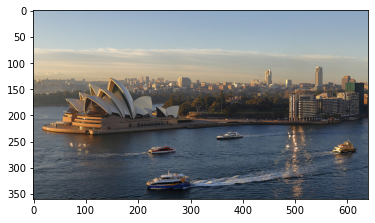

In [21]:
original_img = plt.imread('Sydney-Opera-House.png')
plt.imshow(original_img)

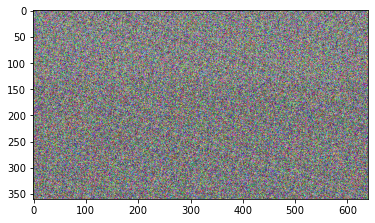

In [22]:
encrypted_img = plt.imread('encrypted.png')
plt.imshow(encrypted_img)

## Image file decrypt stage
### Decrypt and show resultant image

In [23]:
encrypt_decrypt_image('encrypted.png', 'key_file.txt', 'decrypted.png')

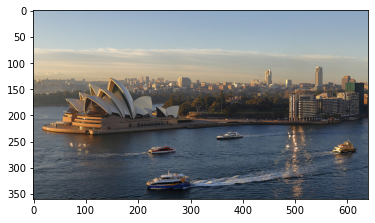

In [24]:
decrypted_img = plt.imread('decrypted.png')
plt.imshow(decrypted_img)

## Histograms for original, encrypted, and decrypted images

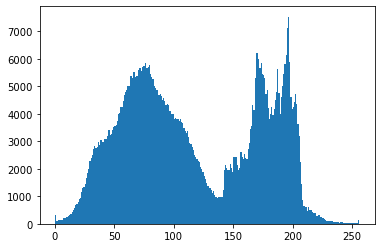

In [41]:
original_img_c = cv2.imread('Sydney-Opera-House.png', 1)
plt.hist(original_img_c.ravel(),256,[0,256]); 
plt.show()

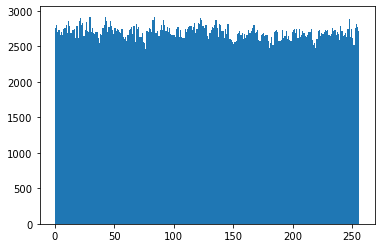

In [42]:
enc_img_c = cv2.imread('encrypted.png', 1)
plt.hist(enc_img_c.ravel(),256,[0,256]); 
plt.show()

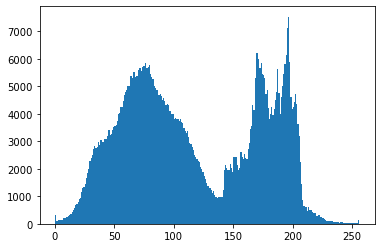

In [43]:
dec_img_c = cv2.imread('decrypted.png', 1)
plt.hist(dec_img_c.ravel(),256,[0,256]); 
plt.show()

In [28]:
encrypt_decrypt_image('conv_m.png', 'key_file.txt', 'encrypted_m.png')

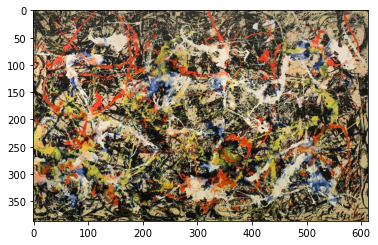

In [44]:
original_conv = plt.imread('conv_m.png')
plt.imshow(original_conv)

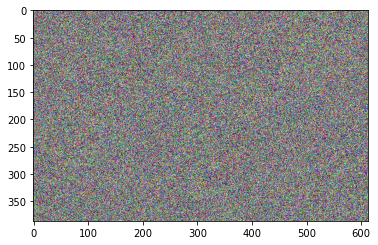

In [45]:
enc_conv = plt.imread('encrypted_m.png')
plt.imshow(enc_conv)

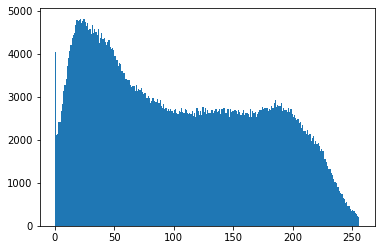

In [46]:
original_img_conv = cv2.imread('conv_m.png', 1)
plt.hist(original_img_conv.ravel(),256,[0,256]); 
plt.show()

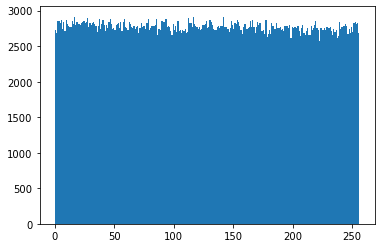

In [47]:
enc_img_conv = cv2.imread('encrypted_m.png', 1)
plt.hist(enc_img_conv.ravel(),256,[0,256]); 
plt.show()

# Text encryption through image

In [48]:
def encode_decode_data_with_image(from_file_path, key_image_path, to_file_path):
    from_file_handle = open(from_file_path, 'r', encoding='utf8')
    key_img = Image.open(key_image_path)
    to_file_handle = open(to_file_path, 'w', encoding='utf8')
    
    from_file_handle.seek(0, 0)
    
    i = 0
    
    process_complete = False
    while not process_complete:
        for r in range(key_img.size[0]):
            if process_complete:
                break
            
            for c in range((key_img.size[1])):
                rgb = key_img.getpixel((r, c))
                p_i = from_file_handle.read(1)
                if p_i == '':
                    process_complete = True
                    break
                
                int_p_i = ord(p_i)
                if int_p_i == 128:
                    # handle ASCII 13 (\r)
                    int_p_i = 13
                int_p_i_XOR_k_i = (int_p_i^(rgb[0]^rgb[1]^rgb[2])) % 128
                if int_p_i_XOR_k_i == 13:
                    p_i_XOR_k_i = chr(128)
                else:
                    p_i_XOR_k_i = chr(int_p_i_XOR_k_i)
                
                i = i+1
                print('{}.\t{} ({})\t^\t ({})\t->\t{} ({})'.format(i, p_i, int_p_i, rgb, p_i_XOR_k_i, int_p_i_XOR_k_i))
                
                to_file_handle.write(p_i_XOR_k_i)
    
    from_file_handle.close()
    to_file_handle.close()

### Text file encode stage
### Dump data into 'plain_to_cipher_using_img_key.txt'

In [49]:
t0 = time.perf_counter()
encode_decode_data_with_image('plaintext_file.txt', 'Sydney-Opera-House.png', 'plain_to_cipher_using_img_key.txt')
t1 = time.perf_counter() - t0
print('Elapsed: ', t1)

1.	H (72)	^	 ((170, 187, 203))	->	 (18)
2.	i (105)	^	 ((170, 187, 203))	->	3 (51)
3.	, (44)	^	 ((170, 187, 203))	->	v (118)
4.	  (32)	^	 ((171, 188, 204))	->	{ (123)
5.	t (116)	^	 ((171, 188, 204))	->	/ (47)
6.	h (104)	^	 ((172, 189, 205))	->	4 (52)
7.	i (105)	^	 ((172, 189, 205))	->	5 (53)
8.	s (115)	^	 ((172, 189, 205))	->	/ (47)
9.	  (32)	^	 ((173, 190, 206))	->	} (125)
10.	i (105)	^	 ((173, 190, 206))	->	4 (52)
11.	s (115)	^	 ((174, 191, 207))	->	- (45)
12.	  (32)	^	 ((174, 191, 207))	->	~ (126)
13.	a (97)	^	 ((174, 192, 206))	->	A (65)
14.	  (32)	^	 ((174, 192, 206))	->	  (0)
15.	
 (10)	^	 ((175, 193, 207))	->	+ (43)
16.	t (116)	^	 ((175, 193, 207))	->	U (85)
17.	e (101)	^	 ((175, 193, 205))	->	F (70)
18.	m (109)	^	 ((175, 193, 205))	->	N (78)
19.	p (112)	^	 ((176, 194, 206))	->	L (76)
20.	o (111)	^	 ((177, 194, 204))	->	P (80)
21.	r (114)	^	 ((177, 194, 204))	->	M (77)
22.	a (97)	^	 ((178, 195, 205))	->	] (93)
23.	r (114)	^	 ((178, 195, 205))	->	N (78)
24.	y (121)	^	 ((178, 195,

1983.	i (105)	^	 ((76, 77, 72))	->	  (32)
1984.	s (115)	^	 ((82, 82, 80))	->	# (35)
1985.	  (32)	^	 ((89, 93, 96))	->	D (68)
1986.	p (112)	^	 ((96, 100, 103))	->	 (19)
1987.	r (114)	^	 ((103, 107, 110))	->	 (16)
1988.	i (105)	^	 ((106, 109, 114))	->	 (28)
1989.	n (110)	^	 ((109, 114, 118))	->	 (7)
1990.	c (99)	^	 ((113, 118, 124))	->	 (24)
1991.	i (105)	^	 ((116, 121, 127))	->	 (27)
1992.	p (112)	^	 ((116, 121, 127))	->	 (2)
1993.	l (108)	^	 ((114, 121, 127))	->	 (24)
1994.	e (101)	^	 ((115, 122, 128))	->	l (108)
1995.	  (32)	^	 ((117, 124, 130))	->	+ (43)
1996.	o (111)	^	 ((116, 123, 129))	->	a (97)
1997.	f (102)	^	 ((119, 126, 132))	->	k (107)
1998.	  (32)	^	 ((135, 143, 146))	->	: (58)
1999.	s (115)	^	 ((120, 128, 131))	->	 (8)
2000.	e (101)	^	 ((121, 129, 132))	->	 (25)
2001.	l (108)	^	 ((116, 123, 131))	->	` (96)
2002.	e (101)	^	 ((111, 118, 124))	->	  (0)
2003.	c (99)	^	 ((113, 121, 124))	->	 (23)
2004.	t (116)	^	 ((125, 130, 134))	->	 (13)
2005.	i (105)	^	 ((130, 135

### Text file decode stage
### Dump data into 'cipher_back_to_plain_using_img_key.txt'

In [50]:
t0 = time.perf_counter()
encode_decode_data_with_image('plain_to_cipher_using_img_key.txt', 'Sydney-Opera-House.png', 'cipher_back_to_plain_using_img_key.txt')
t1 = time.perf_counter() - t0
print('Elapsed: ', t1)

1.	 (18)	^	 ((170, 187, 203))	->	H (72)
2.	3 (51)	^	 ((170, 187, 203))	->	i (105)
3.	v (118)	^	 ((170, 187, 203))	->	, (44)
4.	{ (123)	^	 ((171, 188, 204))	->	  (32)
5.	/ (47)	^	 ((171, 188, 204))	->	t (116)
6.	4 (52)	^	 ((172, 189, 205))	->	h (104)
7.	5 (53)	^	 ((172, 189, 205))	->	i (105)
8.	/ (47)	^	 ((172, 189, 205))	->	s (115)
9.	} (125)	^	 ((173, 190, 206))	->	  (32)
10.	4 (52)	^	 ((173, 190, 206))	->	i (105)
11.	- (45)	^	 ((174, 191, 207))	->	s (115)
12.	~ (126)	^	 ((174, 191, 207))	->	  (32)
13.	A (65)	^	 ((174, 192, 206))	->	a (97)
14.	  (0)	^	 ((174, 192, 206))	->	  (32)
15.	+ (43)	^	 ((175, 193, 207))	->	
 (10)
16.	U (85)	^	 ((175, 193, 207))	->	t (116)
17.	F (70)	^	 ((175, 193, 205))	->	e (101)
18.	N (78)	^	 ((175, 193, 205))	->	m (109)
19.	L (76)	^	 ((176, 194, 206))	->	p (112)
20.	P (80)	^	 ((177, 194, 204))	->	o (111)
21.	M (77)	^	 ((177, 194, 204))	->	r (114)
22.	] (93)	^	 ((178, 195, 205))	->	a (97)
23.	N (78)	^	 ((178, 195, 205))	->	r (114)
24.	E (69)	^	 ((178, 195, 

1973.	  (32)	^	 ((79, 80, 75))	->	t (116)
1974.	. (46)	^	 ((78, 79, 74))	->	e (101)
1975.	& (38)	^	 ((79, 80, 75))	->	r (114)
1976.	= (61)	^	 ((81, 82, 77))	->	s (115)
1977.	u (117)	^	 ((87, 87, 85))	->	  (32)
1978.	= (61)	^	 ((76, 77, 72))	->	t (116)
1979.	% (37)	^	 ((81, 80, 75))	->	o (111)
1980.	i (105)	^	 ((84, 81, 76))	->	  (32)
1981.	  (32)	^	 ((95, 92, 87))	->	t (116)
1982.	' (39)	^	 ((82, 81, 76))	->	h (104)
1983.	  (32)	^	 ((76, 77, 72))	->	i (105)
1984.	# (35)	^	 ((82, 82, 80))	->	s (115)
1985.	D (68)	^	 ((89, 93, 96))	->	  (32)
1986.	 (19)	^	 ((96, 100, 103))	->	p (112)
1987.	 (16)	^	 ((103, 107, 110))	->	r (114)
1988.	 (28)	^	 ((106, 109, 114))	->	i (105)
1989.	 (7)	^	 ((109, 114, 118))	->	n (110)
1990.	 (24)	^	 ((113, 118, 124))	->	c (99)
1991.	 (27)	^	 ((116, 121, 127))	->	i (105)
1992.	 (2)	^	 ((116, 121, 127))	->	p (112)
1993.	 (24)	^	 ((114, 121, 127))	->	l (108)
1994.	l (108)	^	 ((115, 122, 128))	->	e (101)
1995.	+ (43)	^	 ((117, 124, 130))	->	  (32)
1996.	a (

In [51]:
diffcheck('plaintext_file.txt', 'cipher_back_to_plain_using_img_key.txt')

No diff


In [52]:
def decode_data_with_image_r(from_file_path, key_image_path, to_file_path):
    from_file_handle = open(from_file_path, 'r', encoding='utf8')
    key_img = Image.open(key_image_path)
    to_file_handle = open(to_file_path, 'w', encoding='utf8')
    
    from_file_handle.seek(0, 0)
    
    i = 0
    
    process_complete = False
    while not process_complete:
        for r in range(key_img.size[0]):
            if process_complete:
                break
            
            for c in range((key_img.size[1])):
                rgb = key_img.getpixel((r, c))
                p_i = from_file_handle.read(1)
                if p_i == '':
                    process_complete = True
                    break
                
                int_p_i = ord(p_i)
                if int_p_i == 128:
                    # handle ASCII 13 (\r)
                    int_p_i = 13
                int_p_i_XOR_k_i = (int_p_i^(rgb[0])) % 128
                if int_p_i_XOR_k_i == 13:
                    p_i_XOR_k_i = chr(128)
                else:
                    p_i_XOR_k_i = chr(int_p_i_XOR_k_i)
                
                i = i+1
                print('{}.\t{} ({})\t^\t ({})\t->\t{} ({})'.format(i, p_i, int_p_i, rgb, p_i_XOR_k_i, int_p_i_XOR_k_i))
                
                to_file_handle.write(p_i_XOR_k_i)
    
    from_file_handle.close()
    to_file_handle.close()

In [53]:
t0 = time.perf_counter()
decode_data_with_image_r('plain_to_cipher_using_img_key.txt', 'Sydney-Opera-House.png', 'cipher_back_to_plain_using_img_key_r.txt')
t1 = time.perf_counter() - t0
print('Elapsed: ', t1)

1.	 (18)	^	 ((170, 187, 203))	->	8 (56)
2.	3 (51)	^	 ((170, 187, 203))	->	 (25)
3.	v (118)	^	 ((170, 187, 203))	->	\ (92)
4.	{ (123)	^	 ((171, 188, 204))	->	P (80)
5.	/ (47)	^	 ((171, 188, 204))	->	 (4)
6.	4 (52)	^	 ((172, 189, 205))	->	 (24)
7.	5 (53)	^	 ((172, 189, 205))	->	 (25)
8.	/ (47)	^	 ((172, 189, 205))	->	 (3)
9.	} (125)	^	 ((173, 190, 206))	->	P (80)
10.	4 (52)	^	 ((173, 190, 206))	->	 (25)
11.	- (45)	^	 ((174, 191, 207))	->	 (3)
12.	~ (126)	^	 ((174, 191, 207))	->	P (80)
13.	A (65)	^	 ((174, 192, 206))	->	o (111)
14.	  (0)	^	 ((174, 192, 206))	->	. (46)
15.	+ (43)	^	 ((175, 193, 207))	->	 (4)
16.	U (85)	^	 ((175, 193, 207))	->	z (122)
17.	F (70)	^	 ((175, 193, 205))	->	i (105)
18.	N (78)	^	 ((175, 193, 205))	->	a (97)
19.	L (76)	^	 ((176, 194, 206))	->	| (124)
20.	P (80)	^	 ((177, 194, 204))	->	a (97)
21.	M (77)	^	 ((177, 194, 204))	->	| (124)
22.	] (93)	^	 ((178, 195, 205))	->	o (111)
23.	N (78)	^	 ((178, 195, 205))	->	| (124)
24.	E (69)	^	 ((178, 195, 205))	->	w 

2668.	 (31)	^	 ((118, 115, 110))	->	i (105)
2669.	A (65)	^	 ((122, 118, 109))	->	; (59)
2670.	 (4)	^	 ((120, 112, 101))	->	| (124)
2671.	 (28)	^	 ((122, 114, 103))	->	f (102)
2672.	! (33)	^	 ((136, 127, 118))	->	) (41)
2673.	 (12)	^	 ((142, 135, 117))	->	 (2)
2674.	b (98)	^	 ((134, 125, 120))	->	d (100)
2675.	g (103)	^	 ((129, 121, 118))	->	f (102)
2676.	b (98)	^	 ((128, 124, 112))	->	b (98)
2677.	8 (56)	^	 ((128, 122, 110))	->	8 (56)
2678.	& (38)	^	 ((132, 122, 120))	->	" (34)
2679.	k (107)	^	 ((130, 121, 114))	->	i (105)
2680.	- (45)	^	 ((107, 99, 80))	->	F (70)
2681.	> (62)	^	 ((84, 84, 74))	->	j (106)
2682.	v (118)	^	 ((95, 92, 85))	->	) (41)
2683.	! (33)	^	 ((79, 74, 70))	->	n (110)
2684.	 (12)	^	 ((98, 94, 85))	->	n (110)
2685.	* (42)	^	 ((95, 88, 78))	->	u (117)
2686.	* (42)	^	 ((94, 90, 79))	->	t (116)
2687.	$ (36)	^	 ((94, 91, 84))	->	z (122)
2688.	, (44)	^	 ((88, 84, 83))	->	t (116)
2689.	1 (49)	^	 ((79, 80, 75))	->	~ (126)
2690.	t (116)	^	 ((79, 80, 75))	->	; (59)
2691

In [54]:
diffcheck('plaintext_file.txt', 'cipher_back_to_plain_using_img_key_r.txt')

Diff found: Hi, this is a 
 vs 8\PPPo.zia|a|o|w.lcfl)|xno)ch'njvjckbkq#vjg"A-S alxnmvkup1>Hyh<F^Hr<~|k=	W QY^|w\?]^@#EIUJ]\UA9<X_EGG>s

Diff
